In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import csv

files = os.listdir("npz")
print(files)
file0 = np.load("npz/{}".format(files[0]))
file1 = np.load("npz/{}".format(files[1]))

print(file0.keys())
print(file1.keys())

['20190213-two-moon-various-parameters-1.npz', '20190213-two-moon-various-parameters-0.npz']
['svm_only', 'tf_only', 'tf_svm2', 'tf_svm4', 'tf_svm6', 'tf_svm16', 'tf_svm64']
['svm_only', 'tf_only', 'tf_svm2', 'tf_svm4', 'tf_svm6', 'tf_svm16', 'tf_svm64']


In [2]:
print(file0['svm_only'].item()['10-8000'])

[0.91112499999999996]


# SVM_ONLY

In [3]:
name = 'svm_only'
svm_only = []

for i in file0[name].item():
    value = file0[name].item()[i]
    if len(value)>0:
        s = i.split("-")
        s.append(value[0])
        svm_only.append(s)
        
for i in file1[name].item():
    value = file1[name].item()[i]
    if len(value)>0:
        s = i.split("-")
        s.append(value[0])
        svm_only.append(s)

import csv
try:
    os.remove("{}.csv".format('svm_only'))
    print("file removed")
except:
    with open("svm_only.csv","w") as F:
        csv_writer = csv.writer(F)
        for i in svm_only:
            csv_writer.writerow([name]+i)

In [4]:
svm_only_pd = pd.DataFrame(data=svm_only)
svm_only_pd.columns = ['noise', 'data size', 'accuracy']
for i in svm_only_pd.columns:
    svm_only_pd[i] = pd.to_numeric(svm_only_pd[i], errors='ignore')
svm_only_pd.insert(0,'data',name)
svm_only_pd= svm_only_pd.sort_values(by=['noise','data size'])
svm_only_pd

,data,noise,data size,accuracy
15,svm_only,10,500,0.870000
16,svm_only,10,1000,0.870000
17,svm_only,10,2000,0.884500
18,svm_only,10,4000,0.898250
0,svm_only,10,8000,0.911125
1,svm_only,10,16000,0.941187
2,svm_only,10,32000,0.968375
19,svm_only,20,500,0.852000
20,svm_only,20,1000,0.857000
21,svm_only,20,2000,0.874000


# tf_only

In [5]:
tf_only = []

name = 'tf_only'
tf_only = []

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_only.append(s+[epochs[e]]+[value[e]])

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_only.append(s+[epochs[e]]+[value[e]])

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_only:
            csv_writer.writerow([name]+i)

file removed


In [6]:
df = pd.DataFrame(data=tf_only)
df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')

df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])
# df = df.groupby(['data','noise','data size']).describe()

# df = df[['accuracy']]

tf_only_pd= df
tf_only_pd

,data,noise,data size,epochs,accuracy
375,tf_only,10,500,5200,0.946000
376,tf_only,10,500,5400,0.946000
377,tf_only,10,500,5600,0.936000
378,tf_only,10,500,5800,0.946000
379,tf_only,10,500,6000,0.940000
380,tf_only,10,500,6200,0.954000
381,tf_only,10,500,6400,0.946000
382,tf_only,10,500,6600,0.934000
383,tf_only,10,500,6800,0.950000
384,tf_only,10,500,7000,0.944000


# tf_svm2

In [7]:
tf_svm2 = []

name = 'tf_svm2'
tf_svm2 = []

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_svm2.append(s+[epochs[e]]+[value[e]])

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_svm2.append(s+[epochs[e]]+[value[e]])

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_svm2:
            csv_writer.writerow([name]+i)

file removed


In [8]:
df = pd.DataFrame(data=tf_svm2)
df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')
df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])

# df = df.groupby(['data','noise','data size']).describe()
# df = df[['accuracy']]

tf_svm2_pd = df

tf_svm2_pd

,data,noise,data size,epochs,accuracy
375,tf_svm2,10,500,5200,0.946000
376,tf_svm2,10,500,5400,0.948000
377,tf_svm2,10,500,5600,0.928000
378,tf_svm2,10,500,5800,0.946000
379,tf_svm2,10,500,6000,0.944000
380,tf_svm2,10,500,6200,0.942000
381,tf_svm2,10,500,6400,0.950000
382,tf_svm2,10,500,6600,0.940000
383,tf_svm2,10,500,6800,0.944000
384,tf_svm2,10,500,7000,0.952000


# tf_svm4

In [9]:
tf_svm4 = [] # ----

name = 'tf_svm4'
tf_svm4 = [] # ----

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_svm4.append(s+[epochs[e]]+[value[e]]) # ----

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_svm4.append(s+[epochs[e]]+[value[e]]) # ----

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_svm4:
            csv_writer.writerow([name]+i)

file removed


In [10]:
df = pd.DataFrame(data=tf_svm4) # ---

df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')

df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])

# df = df.groupby(['data','noise','data size']).describe()
# df = df[['accuracy']]

tf_svm4_pd = df # ---
tf_svm4_pd # ---

,data,noise,data size,epochs,accuracy
375,tf_svm4,10,500,5200,0.976000
376,tf_svm4,10,500,5400,0.974000
377,tf_svm4,10,500,5600,0.966000
378,tf_svm4,10,500,5800,0.978000
379,tf_svm4,10,500,6000,0.978000
380,tf_svm4,10,500,6200,0.972000
381,tf_svm4,10,500,6400,0.978000
382,tf_svm4,10,500,6600,0.974000
383,tf_svm4,10,500,6800,0.978000
384,tf_svm4,10,500,7000,0.968000


# tf_svm6

In [11]:
tf_svm6 = [] # ----
name = 'tf_svm6'

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_svm6.append(s+[epochs[e]]+[value[e]]) # ----

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_svm6.append(s+[epochs[e]]+[value[e]]) # ----

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_svm6: # -----
            csv_writer.writerow([name]+i)

file removed


In [12]:
df = pd.DataFrame(data=tf_svm6) # ---

df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')
    
df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])
# df = df.groupby(['data','noise','data size']).describe()
# df = df[['accuracy']]
tf_svm6_pd = df # ---
df

,data,noise,data size,epochs,accuracy
375,tf_svm6,10,500,5200,0.976000
376,tf_svm6,10,500,5400,0.974000
377,tf_svm6,10,500,5600,0.966000
378,tf_svm6,10,500,5800,0.978000
379,tf_svm6,10,500,6000,0.976000
380,tf_svm6,10,500,6200,0.972000
381,tf_svm6,10,500,6400,0.978000
382,tf_svm6,10,500,6600,0.974000
383,tf_svm6,10,500,6800,0.978000
384,tf_svm6,10,500,7000,0.970000


# tf_svm16

In [13]:
tf_svm16 = [] # ----
name = 'tf_svm16'

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_svm16.append(s+[epochs[e]]+[value[e]]) # ----

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_svm16.append(s+[epochs[e]]+[value[e]]) # ----

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_svm16: # -----
            csv_writer.writerow([name]+i)

In [14]:
df = pd.DataFrame(data=tf_svm16) # ---

df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')
    
df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])
# df = df.groupby(['data','noise','data size']).describe()
# df = df[['accuracy']]
tf_svm16_pd = df # ---
df

,data,noise,data size,epochs,accuracy
375,tf_svm16,10,500,5200,0.974000
376,tf_svm16,10,500,5400,0.974000
377,tf_svm16,10,500,5600,0.964000
378,tf_svm16,10,500,5800,0.978000
379,tf_svm16,10,500,6000,0.976000
380,tf_svm16,10,500,6200,0.972000
381,tf_svm16,10,500,6400,0.982000
382,tf_svm16,10,500,6600,0.978000
383,tf_svm16,10,500,6800,0.978000
384,tf_svm16,10,500,7000,0.976000


# tf_svm64

In [15]:
tf_svm64 = [] # ----
name = 'tf_svm64'

epochs = list(range(5200,10001,200))

file_item = file0[name].item()

for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")
        for e in range(len(epochs)):
            tf_svm64.append(s+[epochs[e]]+[value[e]]) # ----

file_item = file1[name].item()            
for i in file_item:
    value = file_item[i]
    if len(value)>0:
        s = i.split("-")     
        for e in range(len(epochs)):
            tf_svm64.append(s+[epochs[e]]+[value[e]]) # ----

try:
    os.remove("{}.csv".format(name))
    print("file removed")
except:
    with open("{}.csv".format(name),"w") as F:
        csv_writer = csv.writer(F)
        for i in tf_svm64: # -----
            csv_writer.writerow([name]+i)

In [16]:
df = pd.DataFrame(data=tf_svm64) # ---

df.columns = ['noise', 'data size', 'epochs', 'accuracy']
for i in df.columns:
    df[i] = pd.to_numeric(df[i], errors='ignore')
    
df.insert(0,'data',name)
df= df.sort_values(by=['noise','data size','epochs'])
# df = df.groupby(['data','noise','data size']).describe()
# df = df[['accuracy']]
tf_svm64_pd = df # ---
df

,data,noise,data size,epochs,accuracy
375,tf_svm64,10,500,5200,0.886000
376,tf_svm64,10,500,5400,0.884000
377,tf_svm64,10,500,5600,0.882000
378,tf_svm64,10,500,5800,0.886000
379,tf_svm64,10,500,6000,0.888000
380,tf_svm64,10,500,6200,0.888000
381,tf_svm64,10,500,6400,0.892000
382,tf_svm64,10,500,6600,0.888000
383,tf_svm64,10,500,6800,0.888000
384,tf_svm64,10,500,7000,0.888000


# Combining

In [17]:
combined = pd.concat([svm_only_pd, tf_only_pd, tf_svm2_pd, tf_svm4_pd, tf_svm6_pd, tf_svm16_pd,tf_svm64_pd])
c_group=combined.groupby(['data','noise','data size']).describe()
c_group = c_group['accuracy']
c_group

/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


count      mean       std       min       25%  \
data     noise data size                                                  
svm_only 10    500          1.0  0.870000       NaN  0.870000  0.870000   
               1000         1.0  0.870000       NaN  0.870000  0.870000   
               2000         1.0  0.884500       NaN  0.884500  0.884500   
               4000         1.0  0.898250       NaN  0.898250  0.898250   
               8000         1.0  0.911125       NaN  0.911125  0.911125   
               16000        1.0  0.941187       NaN  0.941187  0.941187   
               32000        1.0  0.968375       NaN  0.968375  0.968375   
         20    500          1.0  0.852000       NaN  0.852000  0.852000   
               1000         1.0  0.857000       NaN  0.857000  0.857000   
               2000         1.0  0.874000       NaN  0.874000  0.874000   
               4000         1.0  0.870750       NaN  0.870750  0.870750   
               8000         1.0  0.875375       NaN  0.875375  0.875375   
               16000        1.0  0.888375       NaN  0.888375  0.888375   
               32000        1.0  0.894094       NaN  0.894094  0.894094   
         40    500          1.0  0.802000       NaN  0.802000  0.802000   
               1000         1.0  0.857000       NaN  0.857000  0.857000   
               2000         1.0  0.857500       NaN  0.857500  0.857500   
               4000         1.0  0.861750       NaN  0.861750  0.861750   
               8000         1.0  0.873750       NaN  0.873750  0.873750   
               16000        1.0  0.879313       NaN  0.879313  0.879313   
               32000        1.0  0.880656       NaN  0.880656  0.880656   
         80    500          1.0  0.784000       NaN  0.784000  0.784000   
               1000         1.0  0.820000       NaN  0.820000  0.820000   
               2000         1.0  0.851500       NaN  0.851500  0.851500   
               4000         1.0  0.860750       NaN  0.860750  0.860750   
               8000         1.0  0.872875       NaN  0.872875  0.872875   
               16000        1.0  0.868563       NaN  0.868563  0.868563   
               32000        1.0  0.875812       NaN  0.875812  0.875812   
         160   500          1.0  0.734000       NaN  0.734000  0.734000   
               1000         1.0  0.806000       NaN  0.806000  0.806000   
...                         ...       ...       ...       ...       ...   
tf_svm64 10    16000       25.0  0.997085  0.000785  0.994875  0.996500   
               32000       25.0  0.995421  0.000436  0.994219  0.995250   
         20    500         25.0  0.843360  0.003200  0.836000  0.840000   
               1000        25.0  0.846280  0.003007  0.841000  0.844000   
               2000        25.0  0.867580  0.004190  0.857000  0.864500   
               4000        25.0  0.886040  0.005445  0.876750  0.882000   
               8000        25.0  0.890540  0.006143  0.882250  0.886000   
               16000       25.0  0.928443  0.008012  0.914312  0.923562   
               32000       25.0  0.909191  0.007691  0.897469  0.899875   
         40    500         25.0  0.838000  0.001291  0.836000  0.838000   
               1000        25.0  0.872680  0.002286  0.867000  0.871000   
               2000        25.0  0.854540  0.001346  0.852000  0.853500   
               4000        25.0  0.848480  0.002209  0.845500  0.847000   
               8000        25.0  0.869770  0.001936  0.866750  0.868000   
               16000       25.0  0.882923  0.001106  0.880250  0.882500   
               32000       25.0  0.886064  0.001265  0.884219  0.884938   
         80    500         25.0  0.821280  0.001275  0.820000  0.820000   
               1000        25.0  0.853240  0.003562  0.846000  0.850000   
               2000        25.0  0.864300  0.001392  0.861500  0.863500   
               4000        25.0  0.863050  0.001350  0.860250  0.862500   
               8000        25.0  0.862190  0.000747

In [27]:
# select svm_only

c_group.xs('svm_only')

count      mean  std       min       25%       50%       75%  \
noise data size                                                                 
10    500          1.0  0.870000  NaN  0.870000  0.870000  0.870000  0.870000   
      1000         1.0  0.870000  NaN  0.870000  0.870000  0.870000  0.870000   
      2000         1.0  0.884500  NaN  0.884500  0.884500  0.884500  0.884500   
      4000         1.0  0.898250  NaN  0.898250  0.898250  0.898250  0.898250   
      8000         1.0  0.911125  NaN  0.911125  0.911125  0.911125  0.911125   
      16000        1.0  0.941187  NaN  0.941187  0.941187  0.941187  0.941187   
      32000        1.0  0.968375  NaN  0.968375  0.968375  0.968375  0.968375   
20    500          1.0  0.852000  NaN  0.852000  0.852000  0.852000  0.852000   
      1000         1.0  0.857000  NaN  0.857000  0.857000  0.857000  0.857000   
      2000         1.0  0.874000  NaN  0.874000  0.874000  0.874000  0.874000   
      4000         1.0  0.870750  NaN  0.870750  0.870750  0.870750  0.870750   
      8000         1.0  0.875375  NaN  0.875375  0.875375  0.875375  0.875375   
      16000        1.0  0.888375  NaN  0.888375  0.888375  0.888375  0.888375   
      32000        1.0  0.894094  NaN  0.894094  0.894094  0.894094  0.894094   
40    500          1.0  0.802000  NaN  0.802000  0.802000  0.802000  0.802000   
      1000         1.0  0.857000  NaN  0.857000  0.857000  0.857000  0.857000   
      2000         1.0  0.857500  NaN  0.857500  0.857500  0.857500  0.857500   
      4000         1.0  0.861750  NaN  0.861750  0.861750  0.861750  0.861750   
      8000         1.0  0.873750  NaN  0.873750  0.873750  0.873750  0.873750   
      16000        1.0  0.879313  NaN  0.879313  0.879313  0.879313  0.879313   
      32000        1.0  0.880656  NaN  0.880656  0.880656  0.880656  0.880656   
80    500          1.0  0.784000  NaN  0.784000  0.784000  0.784000  0.784000   
      1000         1.0  0.820000  NaN  0.820000  0.820000  0.820000  0.820000   
      2000         1.0  0.851500  NaN  0.851500  0.851500  0.851500  0.851500   
      4000         1.0  0.860750  NaN  0.860750  0.860750  0.860750  0.860750   
      8000         1.0  0.872875  NaN  0.872875  0.872875  0.872875  0.872875   
      16000        1.0  0.868563  NaN  0.868563  0.868563  0.868563  0.868563   
      32000        1.0  0.875812  NaN  0.875812  0.875812  0.875812  0.875812   
160   500          1.0  0.734000  NaN  0.734000  0.734000  0.734000  0.734000   
      1000         1.0  0.806000  NaN  0.806000  0.806000  0.806000  0.806000   
      2000         1.0  0.839500  NaN  0.839500  0.839500  0.839500  0.839500   
      4000         1.0  0.850500  NaN  0.850500  0.850500  0.850500  0.850500   
      8000         1.0  0.862000  NaN  0.862000  0.862000  0.862000  0.862000   
      16000        1.0  0.865250  NaN  0.865250  0.865250  0.865250  0.865250   
      32000        1.0  0.873156  NaN  0.873156  0.873156  0.873156  0.873156   

                      max  
noise data size            
10    500        0.870000  
      1000       0.870000  
      2000       0.884500  
      4000       0.898250  
      8000       0.911125  
      16000      0.941187  
      32000      0.968375  
20    500        0.852000  
      1000       0.857000  
      2000       0.874000  
      4000       0.870750  
      8000       0.875375  
      16000      0.888375  
      32000      0.894094  
40    500        0.802000  
      1000       0.857000  
      2000       0.857500  
      4000       0.861750  
      8000       0.873750  
      16000      0.879313  
      32000      0.880656  
80    500        0.784000  
      1000       0.820000  
      2000       0.851500  
      4000       0.860750  
      8000       0.872875  
      16000      0.868563  
      32000      0.875812  
160   500        0.734000  
      1000       0.806000  
      2000       0.839500  
      4000       0.850500  
      8000       0.862000  
      16000      0.865250  
      32000

In [28]:
# select all noise 10

c_group.xs(10, level='noise')

count      mean       std       min       25%       50%  \
data     data size                                                            
svm_only 500          1.0  0.870000       NaN  0.870000  0.870000  0.870000   
         1000         1.0  0.870000       NaN  0.870000  0.870000  0.870000   
         2000         1.0  0.884500       NaN  0.884500  0.884500  0.884500   
         4000         1.0  0.898250       NaN  0.898250  0.898250  0.898250   
         8000         1.0  0.911125       NaN  0.911125  0.911125  0.911125   
         16000        1.0  0.941187       NaN  0.941187  0.941187  0.941187   
         32000        1.0  0.968375       NaN  0.968375  0.968375  0.968375   
tf_only  500         25.0  0.944960  0.008872  0.924000  0.942000  0.946000   
         1000        25.0  0.964000  0.005605  0.946000  0.962000  0.964000   
         2000        25.0  0.967700  0.003256  0.961000  0.965500  0.967500   
         4000        25.0  0.967470  0.002507  0.963500  0.965750  0.967500   
         8000        25.0  0.967575  0.001989  0.964125  0.966375  0.967375   
         16000       25.0  0.968215  0.001279  0.965937  0.967438  0.967938   
         32000       25.0  0.968605  0.000769  0.967094  0.968125  0.968625   
tf_svm16 500         25.0  0.977040  0.004477  0.964000  0.974000  0.976000   
         1000        25.0  0.996760  0.002223  0.992000  0.996000  0.997000   
         2000        25.0  0.998400  0.000935  0.996000  0.998000  0.998500   
         4000        25.0  0.998970  0.000475  0.997750  0.998750  0.999000   
         8000        25.0  0.999620  0.000227  0.999125  0.999500  0.999625   
         16000       25.0  0.999715  0.000146  0.999437  0.999625  0.999687   
         32000       25.0  0.999913  0.000082  0.999594  0.999906  0.999938   
tf_svm2  500         25.0  0.944160  0.010229  0.924000  0.940000  0.946000   
         1000        25.0  0.965000  0.007130  0.946000  0.961000  0.964000   
         2000        25.0  0.966860  0.003782  0.959500  0.964000  0.966000   
         4000        25.0  0.967380  0.002645  0.963250  0.965250  0.966750   
         8000        25.0  0.968175  0.002295  0.964125  0.966500  0.968125   
         16000       25.0  0.968435  0.001208  0.966063  0.967688  0.968437   
         32000       25.0  0.968723  0.000858  0.967094  0.968125  0.968688   
tf_svm4  500         25.0  0.976480  0.004736  0.966000  0.974000  0.976000   
         1000        25.0  0.995400  0.003136  0.986000  0.994000  0.996000   
         2000        25.0  0.998440  0.001102  0.995000  0.998000  0.998500   
         4000        25.0  0.998910  0.000669  0.996250  0.998750  0.999000   
         8000        25.0  0.999590  0.000221  0.999125  0.999500  0.999625   
         16000       25.0  0.999688  0.000169  0.999313  0.999563  0.999687   
         32000       25.0  0.999898  0.000101  0.999469  0.999875  0.999906   
tf_svm6  500         25.0  0.976480  0.004665  0.966000  0.974000  0.976000   
         1000        25.0  0.995920  0.002842  0.989000  0.995000  0.996000   
         2000        25.0  0.998440  0.001083  0.995000  0.998000  0.998500   
         4000        25.0  0.998890  0.000685  0.996250  0.998750  0.999000   
         8000        25.0  0.999595  0.000211  0.999125  0.999500  0.999625   
         16000       25.0  0.999670  0.000180  0.999250  0.999563  0.999687   
         32000       25.0  0.999896  0.000130  0.999313  0.999875  0.999938   
tf_svm64 500         25.0  0.890880  0.003876  0.882000  0.888000  0.892000   
         1000        25.0  0.931840  0.014032  0.912000  0.922000  0.929000   
         2000        25.0  0.964260  0.002916  0.960500  0.961500  0.963500   
         4000        25.0  0.990840  0.001744  0.987250  0.989750  0.990250   
         8000        25.0  0.984480  0.001149  0.981625  0.983500  0.984500   
         16000       25.0  0.997085  0.000785  0.994875  0.996500  0.996938   
         32000       25.0  0.995421  0.000436  0.994219  0.995250  0.9

<Figure size 1440x1440 with 0 Axes>

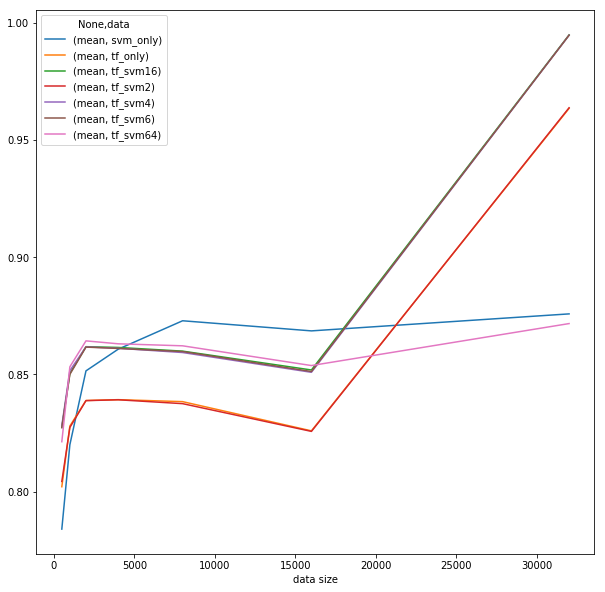

In [68]:
# select all noise 10
noise = 80
select = 'mean'
mean_df = c_group.xs(noise, level='noise').loc[:,'mean']

plt.figure(figsize=(20,20))
df = pd.DataFrame(mean_df)
df.unstack('data').plot(figsize=(10,10))
